# Fundamentals of Machine Learning - Exercise 2


- Johannes Kammerer, Zhao Sun, Tong Yu

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import load_digits
from sklearn import model_selection


# 3 Data Preparation

In [11]:
digits = load_digits()

print(digits.keys())

data = digits["data"]
images = digits["images"]
target = digits["target"]
target_names = digits["target_names"]

print(data.shape,data.dtype)
print(target.shape,target.dtype)
# print(images.shape,images.dtype)
# print(target_names.shape,target_names.dtype)

# Filter out digits 1 and 7 from data set.
target17 = np.hstack([target[target == 1],target[target == 7]])
data17 = np.vstack([data[target == 1], data[target == 7]])

print(target17.shape)
print(data17.shape)

# Separate the data into a training and a test set.
X_train, X_test, y_train, y_test = model_selection.train_test_split(data17, target17, test_size = 0.4, random_state = 0)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
(1797, 64) float64
(1797,) int64
(361,)
(361, 64)
(216, 64) (145, 64)
(216,) (145,)


## 3.1 Dimension Reduction

In [3]:
def reduce_dim(x):
    """
    Feature Selection: select two features which have maximum variance
    
    params
    ------
    x : np.array of size #instances × 64
    
    returns 
    -------
    new_x : np.array of size #instances × 2
    """
    var_X = [np.var(x[:,i]) for i in range(x.shape[1])]
    indices = np.argsort(var_X)
    indices_re = indices[-2:]
    new_x = np.transpose(np.vstack([x[:,indices_re[0]],x[:,indices_re[1]]]))
    
    return new_x
    

In [4]:
# Dimension reduction
training_features = reduce_dim(X_train)
test_features = reduce_dim(X_test)
print(training_features.shape)
print(test_features.shape)

(216, 2)
(145, 2)


## 3.2 Scatterplot

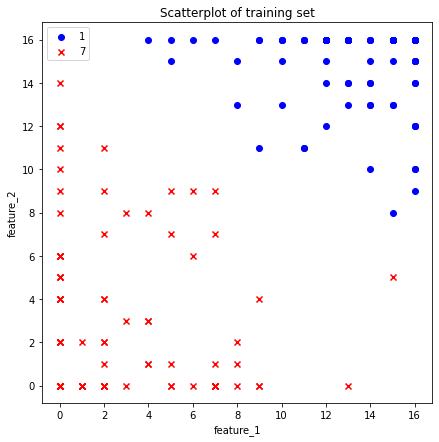

<Figure size 432x288 with 0 Axes>

In [5]:
# Scatterplot of training set
fig = plt.figure(figsize = (7,7))
plt.scatter(training_features[y_train == 1, 0],training_features[y_train == 1, 1], marker="o", c="b",label= "1")
plt.scatter(training_features[y_train == 7, 0],training_features[y_train == 7, 1], marker="x", c="r",label= "7")
plt.legend()
plt.xlabel("feature_1")
plt.ylabel("feature_2")
plt.title("Scatterplot of training set")
plt.show()
plt.tight_layout()

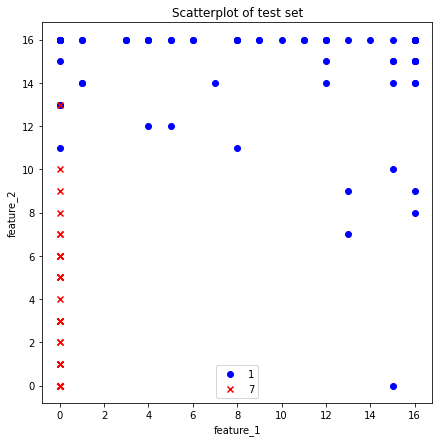

In [6]:
# Scatterplot of test set
fig = plt.figure(figsize = (7,7))
plt.scatter(test_features[y_test == 1, 0],test_features[y_test == 1, 1], marker="o", c="b", label= "1")
plt.scatter(test_features[y_test == 7, 0],test_features[y_test == 7, 1], marker="x", c="r", label= "7")
plt.legend()
plt.xlabel("feature_1")
plt.ylabel("feature_2")
plt.title("Scatterplot of test set")
plt.show()

# 4 Nearest Mean
## 4.1 Implement the nearest mean classifier

In [7]:
def nearest_mean(training_features, training_labels, test_features):
    """
    The nearest mean classifier
    
    params
    ------
    training_features : np.array of size #training × 2
    training_labels : np.array of size #training × 1
    test_features : np.array of size #test × 2
    
    returns 
    -------
    predicted_labels : np.array of size #test
    """
    
    #Find the mean of 2D feature vecotors of each class in the training set
    mean_1 = np.mean(training_features[training_labels == 1], axis = 0)
    mean_7 = np.mean(training_features[training_labels == 7], axis = 0)
    
    #Compute distances between every test instance and mean of each class.
    distance_1 = np.sqrt(np.sum((test_features - mean_1)**2, axis = 1))
    distance_7 = np.sqrt(np.sum((test_features - mean_7)**2, axis = 1))
    
    predicted_labels = []
    for i in range(len(test_features)):
        if distance_1[i] < distance_7[i]:
            predicted_labels.append(1)
        else:
            predicted_labels.append(7)
    return predicted_labels

In [8]:
predicted_labels = nearest_mean(training_features, y_train, test_features)
print('The accurancy of nearest mean classifier :{}'.format(np.mean(predicted_labels == y_test)))

The accurancy of nearest mean classifier :0.9448275862068966


## 4.2 Visualize the decision regions

# 5 QDA
## 5.1 Implement QDA

In [ ]:
y_train[y_train == 1] =0
y_train[y_train == 7] =1

In [40]:
def fit_qda(training_features, training_labels):
    """
    The qda training
    
    params
    ------
    training_features : np.array of size N(#training) × D(feature dimension)
    training_labels : np.array of size N(#training) × 1
    
    returns 
    -------
    mu : np.array of size 2 × D(feature dimension)
    covmat : np.array of size 2 × D × D
    p : np.array of size: 1 × 2
    """
    label = np.unique(training_labels)
    D =label.shape[0]
    
    mu = np.zeros([2,D])
    covmat = np.zeros([2,D,D])
    p = np.zeros(2)
    
    for i in range(D):
        features = training_features[training_labels == label[i]]
        
        mu[i] = np.mean(features, axis = 0)
        covmat[i] = np.cov(features.T)
        p[i] = features.shape[0]/training_features.shape[0]
        
    return mu, covmat, p

In [41]:
mu, covmat, p = fit_qda(training_features, y_train)
print(mu)
print(covmat)
print(p)

[[13.48148148 14.99074074]
 [ 2.30555556  2.49074074]]
[[[ 8.08376601 -0.22914503]
  [-0.22914503  3.2802873 ]]

 [[10.27024922 -0.11396677]
  [-0.11396677 12.68215646]]]
[0.5 0.5]


## 5.2 Implement QDA Prediction